### Pontos importantes

Antes de entrar na criação em si, vamos entender alguns pontos que vão ajudar na compreenção da análise do modelo.

A matriz de confusão nos permite analisar de forma detalhada o comportamento do nosso classificador, e para isso ela divide nossos resultados em quatro:

* **True Positive(TP)**: Se refere aos casos que o modelo previu corretamente a classe positiva.

* **True Negative(TN)**: Se refere aos casos que o modelo previu corretamente a classe negativa.

* **False Positivo(FP)**: Se refere aos casos que o modelo previu que era de uma classe positiva o resultado mas na verdade era da classe negativa.

* **False Negative(FN)**: Se refere aos casos que o modelo previu que era de uma classe negativa o resultado mas na verdade era da classe positiva.

Para exemplificar uma matriz de confusão de um problema binário, segue abaixo um exemplo.

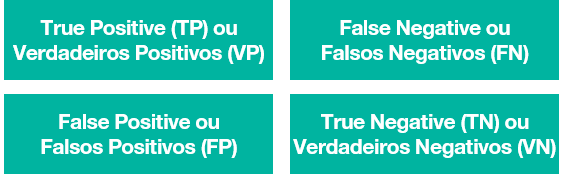

#### Métricas

Essas métricas são utilizadas para responder algumas perguntas.

* **Accuracy**: Qual a frequência de acertos do nosso classificador?
> $$ \frac{TP+FP}{TP+TN+FP+FN} $$

* **Precision**: Quando classifiquei como correto, quantos realmente estavam corretos?
> $$\frac{TP}{TP+FP}$$

* **Recall**: Qual a frequência que o classificador os exemplos de uma classe, ou seja, quando realmente é da classe X ou qual a frequência que você classifica como X.
> $$\frac{TP}{TP+FN}$$

* **F1 Score**: É uma métrica que combina Recall e Precision, e indica a qualidade geral do modelo.
> $$\frac{2*Recall*Precision}{Recall + Precision}$$

## Criação de um modelo baseline
Para a criação de um modelo inicial para nos basearmos, iremos seguir algumas etapas.

* Feature Engineering
* Modeling
* Performance Analysis


In [1]:
# importando bibliotecas
import pandas as pd
from asd import dataset,metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

%matplotlib inline

In [2]:
# Criando dataframe
df = dataset.autism()
df.set_index('id',inplace = True)
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
id,,,,,,,,,,,,,,,,,,,,,
1,1,1,0,0,1,1,0,1,0,0,...,m,Others,no,no,Jordan,no,5,4-11 years,Parent,NO
2,1,1,0,0,1,1,0,1,0,0,...,m,Middle Eastern,no,no,Jordan,no,5,4-11 years,Parent,NO
3,1,1,0,0,0,1,1,1,0,0,...,m,?,no,no,Jordan,yes,5,4-11 years,?,NO
4,0,1,0,0,1,1,0,0,0,1,...,f,?,yes,no,Jordan,no,4,4-11 years,?,NO
5,1,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,United States,no,10,4-11 years,Parent,YES


In [3]:
# Função de plotagem da matriz de confusão
def plot_confusion_matrix(y_test,result,cmap = plt.cm.Blues):
    # Confusion matrix
    cm = confusion_matrix(y_test,result)
    classe = unique_labels(y_test,result)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classe, yticklabels=classe,
           title= 'Matriz de confusão',
           ylabel='Rótulo real',
           xlabel='Rótulo previsto')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    #fmt = '.2f' if _ else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j]),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


### 1. Feature Engineering

Nessa etapa será selecionado as features que vamos utilizar no modelo baseline.

In [4]:
# Selecionando colunas com os traços comportamentais.
columns = ['A{}_Score'.format(i) for i in range(1,11)]

# Separando em variáveis preditoras X e alvo da nossa predição Y
X = df[columns]
Y = df['Class/ASD']

# Para melhor entendimento do dataset, iremos renomear os valores de Y
Y = Y.replace({'NO':'Sem_Autismo','YES':'Autismo'})

### 2. Modeling

Nessa etapa aplicaremos o modelo que foi selecionado e com isso a contrução das predições do nosso modelo baseline.

* Modelo selecionado: Decision Tree
* Motivo: Fácil compreensão.

In [5]:
# Criação do modelo

baseline = tree.DecisionTreeClassifier()

Nessa parte testarei duas técnicas para evitar que o modelo se "acostume" com o nosso banco de dados.

* Separando em treino e teste
* Validação cruzada

#### Treino e Teste

In [6]:
# Separando em treino e teste
x_train,x_test,y_train,y_test = train_test_split(X,Y,
                                                 test_size = 0.4,
                                                 random_state = 40)

# Treinando o modelo
test1 = baseline.fit(x_train,y_train)

results = test1.predict(x_test)


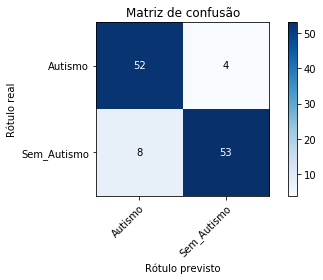

In [7]:
# Informações do modelo
plot_confusion_matrix(y_test,results)
metrics1 = metrics.confusion_metrics(y_test,results)
plt.show()

In [8]:
print("Métricas da matriz de confusão: \n")
print(metrics1)

Métricas da matriz de confusão: 

{'accuracy': 0.83823529411764708, 'precision': 0.92982456140350878, 'recall': 0.86885245901639341, 'f1': 0.89830508474576254}


#### K-Fold Cross Validation

A validação cruzada é uma técnica utilizada para evitar que o modelo se "acostume" com nossa base de dados e com isso não generalize novas informações.

**Funcionamento:**

Seu funcionamento se da em "dividir e testar", ou seja, os nossos dados são divididos em X partes, em cada uma dessas partes é novamente dividida em treino e teste e é testada então as partes e esse processo é repetido até que o modelo seja testado e treinado em todas essas partes e no final se calcula a métrica dos testes, dessa forma:

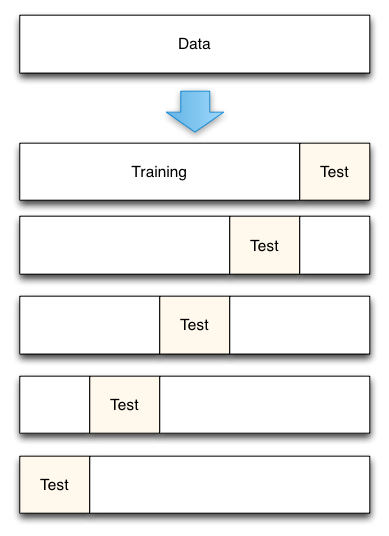

Métricas da matriz de confusão
{'accuracy': 0.89156626506024095, 'precision': 0.92567567567567566, 'recall': 0.9072847682119205, 'f1': 0.91638795986622079}


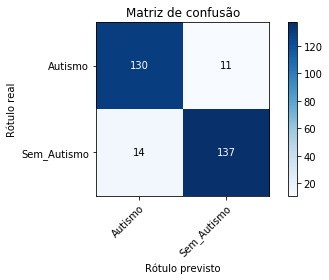

In [9]:
# Validação cruzada
results1 = cross_val_predict(baseline, X, Y,cv = 5)

# Informações do modelo
plot_confusion_matrix(Y,results1)
metrics2 = metrics.confusion_metrics(Y,results1)
print("Métricas da matriz de confusão")
print(metrics2)
plt.show()
    